In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
from Model.models import *
from configs.loader import Config
np.int = np.int_
np.float = np.float64
from utils.io import *
import skvideo.io

%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
floor_plan = cv2.imread('floorplan.png')

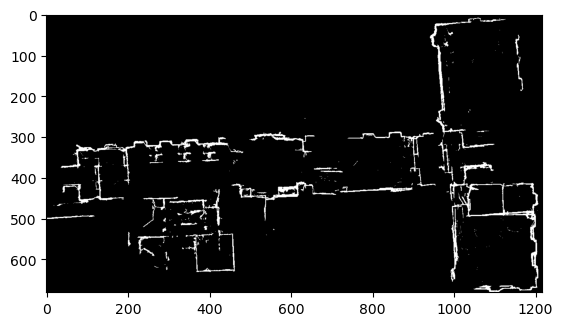

(681, 1217)


In [9]:
grid = np.array(floor_plan)[:,:,0] >= 128  # black pixels are obstacles
plt.imshow(grid, cmap='gray')
plt.show()
print(grid.shape)  # (height, width)

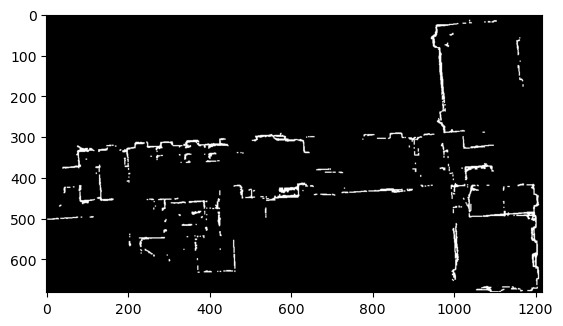

In [19]:
kernel = np.ones((2,2), np.uint8)
# dilated_grid = cv2.dilate(grid.astype(np.uint8), kernel, iterations=2)
opening = cv2.morphologyEx(grid.astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening, cmap='gray')
plt.show()

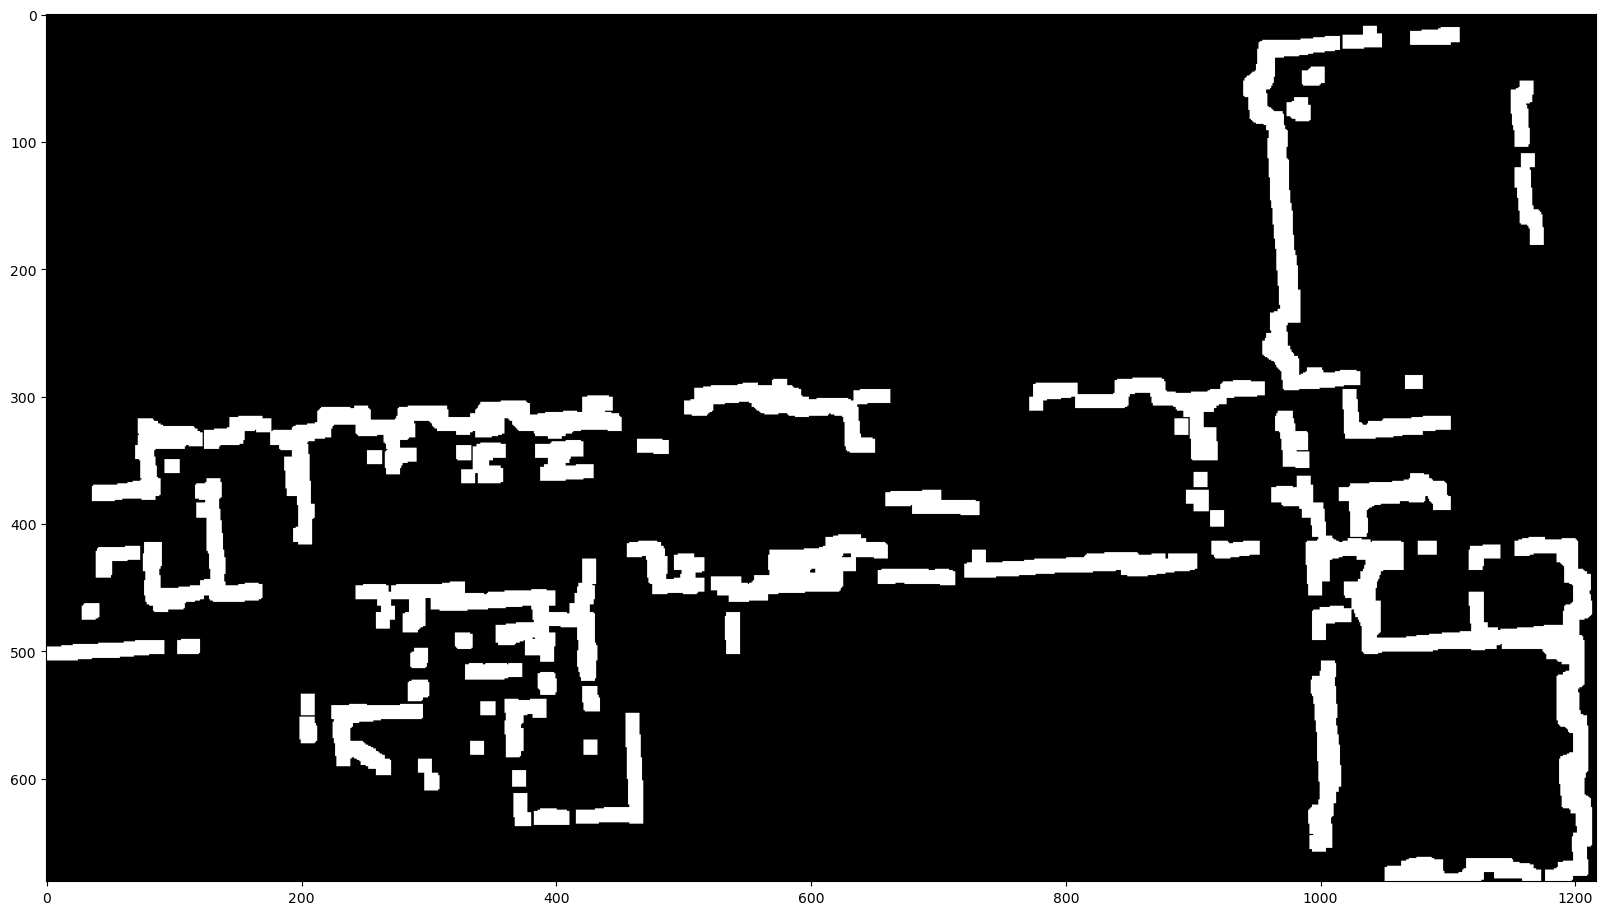

In [20]:
kernel = np.ones((5,5), np.uint8)
dilated_grid = cv2.dilate(opening.astype(np.uint8), kernel, iterations=2)
# opening = cv2.morphologyEx(grid.astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure(figsize=(20,20))
plt.imshow(dilated_grid, cmap='gray')
plt.show()

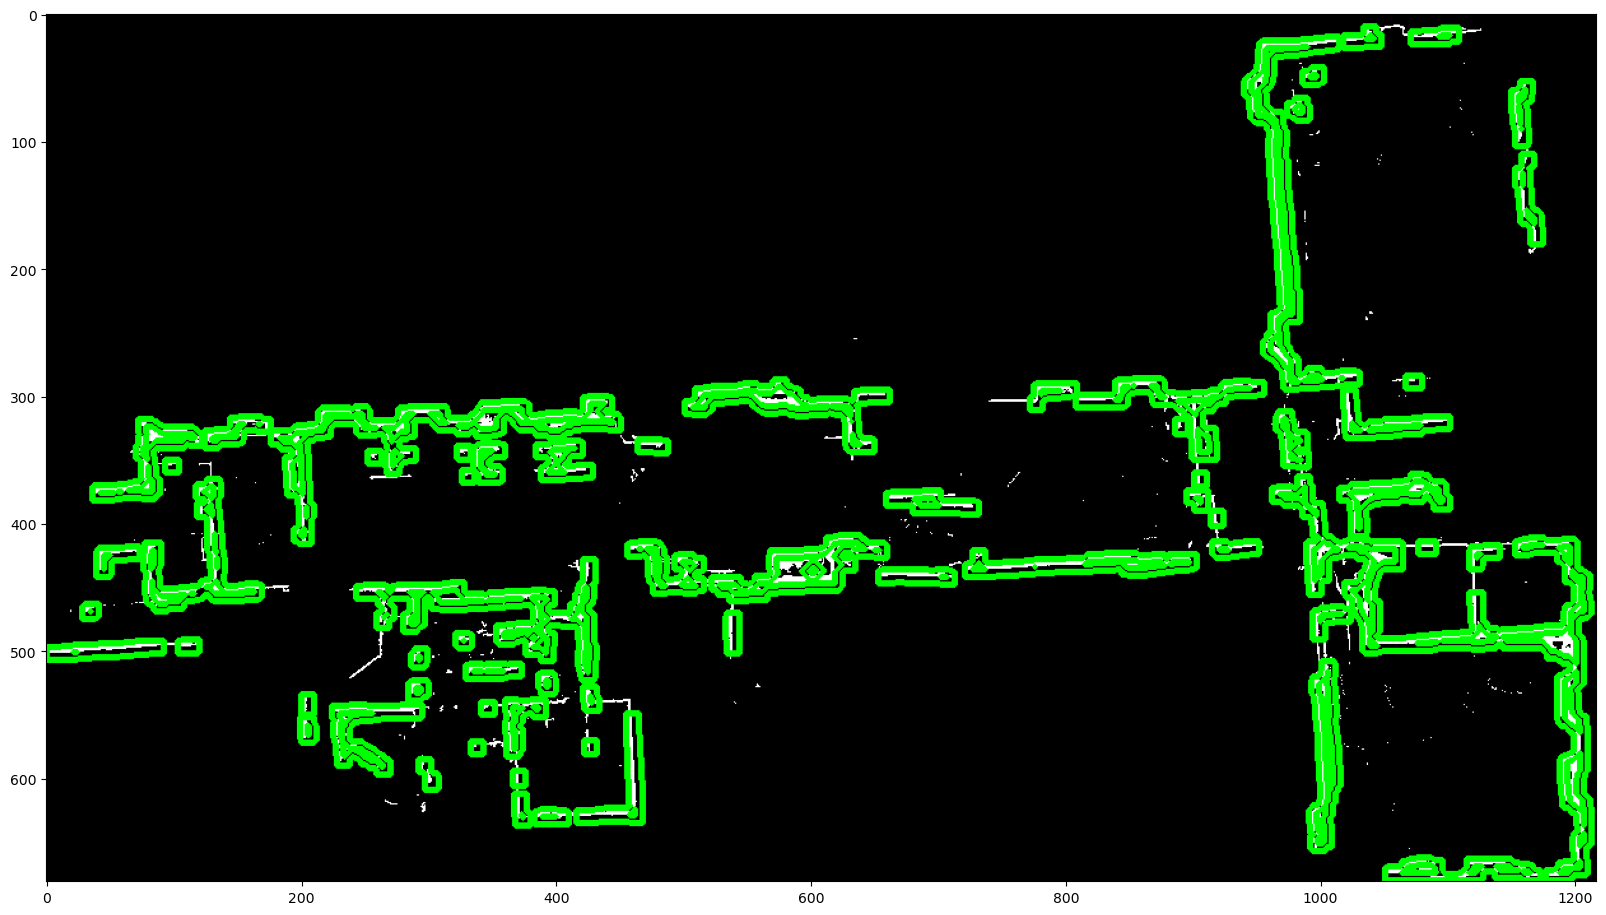

In [39]:
contours, hierarchy = cv2.findContours(dilated_grid, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(floor_plan, contours, -1, (0,255,0), 3)
plt.figure(figsize=(20,20))
plt.imshow(floor_plan)
plt.show()